In [10]:
# Import CSV File
import pandas as pd
import seaborn as sns
wesad = pd.read_csv('wesad-chest-combined-classification-hrv.csv')
wesad

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,1.092856e+07,0.134410,0.249678,7.068440,0.033515,13,baseline,medium,1,0
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,9,baseline,low,0,0
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,4,amusement,medium,1,1
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,8,stress,low,0,2
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,1.311140e+07,0.076385,0.063323,3.259253,0.014438,4,stress,medium,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135645,626.514447,611.246385,50.848737,5.969682,5.938417,8.517829,96.341521,0.00,0.00,4.204367,...,-7.113930e+05,0.271071,0.363785,24.633242,0.006019,5,stress,high,2,2
135646,628.974014,620.689235,64.127172,12.297019,12.293382,5.214855,96.344181,5.00,0.25,8.703647,...,1.184777e+06,0.057490,0.061358,3.873768,0.028697,13,stress,medium,1,2
135647,589.926708,581.814135,51.445399,11.549705,11.541521,4.454261,102.423931,3.25,0.25,8.171334,...,-8.792667e+05,0.107559,0.152385,2.082405,0.121886,10,stress,low,0,2
135648,924.373882,930.926635,88.692462,11.467998,11.467912,7.733910,65.529308,5.50,0.00,8.119220,...,-8.005780e+06,0.333801,0.174757,6.849003,0.002597,5,baseline,high,2,0


WESAD DATASET ANALYSIS, USES THE SUBJECTS DATA TO COMPLEMENT DATASET 

In [11]:
# Check rows missing values
wesad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135650 entries, 0 to 135649
Data columns (total 67 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MEAN_RR                   135650 non-null  float64
 1   MEDIAN_RR                 135650 non-null  float64
 2   SDRR                      135650 non-null  float64
 3   RMSSD                     135650 non-null  float64
 4   SDSD                      135650 non-null  float64
 5   SDRR_RMSSD                135650 non-null  float64
 6   HR                        135650 non-null  float64
 7   pNN25                     135650 non-null  float64
 8   pNN50                     135650 non-null  float64
 9   SD1                       135650 non-null  float64
 10  SD2                       135650 non-null  float64
 11  KURT                      135650 non-null  float64
 12  SKEW                      135650 non-null  float64
 13  MEAN_REL_RR               135650 non-null  f

In [12]:
# Check for duplicates
print('Before dropping duplicates:', wesad.shape)

wesad = wesad.drop_duplicates()
wesad.reset_index(inplace=True, drop=True)

print('After dropping duplicates:', wesad.shape)

Before dropping duplicates: (135650, 67)
After dropping duplicates: (135650, 67)


In [13]:
# Feature Selection
wesad = wesad[['HR', 'subject id', 'condition', 'SSSQ class', 'SSSQ Label', 'condition label']]
wesad

,HR,subject id,condition,SSSQ class,SSSQ Label,condition label
0,91.050077,13,baseline,medium,1,0
1,80.267696,9,baseline,low,0,0
2,61.720802,4,amusement,medium,1,1
3,87.996270,8,stress,low,0,2
4,83.637107,4,stress,medium,1,2
...,...,...,...,...,...,...
135645,96.341521,5,stress,high,2,2
135646,96.344181,13,stress,medium,1,2
135647,102.423931,10,stress,low,0,2
135648,65.529308,5,baseline,high,2,0


In [14]:
# Inject Subject Information according to their respective .txt file
for i in range(17):
  fileName = "subject_data/S" + str(i+1) + ".txt"
  try:
    file = open(fileName, "r")
  except FileNotFoundError:
    print("File " + fileName + " does not exist")
    continue
  else:
    lines = file.readlines()
    age = lines[1].split(": ")[1].strip()
    height = lines[2].split(": ")[1].strip()
    weight = lines[3].split(": ")[1].strip()
    gender = lines[4].split(": ")[1].strip()

    subjectID = (wesad['subject id'] == i + 1)
    wesad.loc[subjectID, 'age'] = age
    wesad.loc[subjectID, 'height'] = height
    wesad.loc[subjectID, 'weight'] = weight
    wesad.loc[subjectID, 'gender'] = gender
    file.close()

wesad = wesad.reindex(columns=['subject id', 'age', 'height', 'weight', 'gender', 'HR', 'SSSQ class', 'SSSQ Label', 'condition', 'condition label'])
wesad

File subject_data/S1.txt does not exist
File subject_data/S12.txt does not exist


,subject id,age,height,weight,gender,HR,SSSQ class,SSSQ Label,condition,condition label
0,13,28,181,82,male,91.050077,medium,1,baseline,0
1,9,26,181,75,male,80.267696,low,0,baseline,0
2,4,25,175,90,male,61.720802,medium,1,amusement,1
3,8,27,172,64,female,87.996270,low,0,stress,2
4,4,25,175,90,male,83.637107,medium,1,stress,2
...,...,...,...,...,...,...,...,...,...,...
135645,5,35,189,80,male,96.341521,high,2,stress,2
135646,13,28,181,82,male,96.344181,medium,1,stress,2
135647,10,28,178,76,male,102.423931,low,0,stress,2
135648,5,35,189,80,male,65.529308,high,2,baseline,0


In [15]:
# Hot One Encoding Dataframe
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

wesad['gender'] = label_encoder.fit_transform(wesad['gender'])
wesad['SSSQ class'] = label_encoder.fit_transform(wesad['SSSQ class'])
wesad['condition'] = label_encoder.fit_transform(wesad['condition'])
wesad

,subject id,age,height,weight,gender,HR,SSSQ class,SSSQ Label,condition,condition label
0,13,28,181,82,1,91.050077,2,1,1,0
1,9,26,181,75,1,80.267696,1,0,1,0
2,4,25,175,90,1,61.720802,2,1,0,1
3,8,27,172,64,0,87.996270,1,0,2,2
4,4,25,175,90,1,83.637107,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...
135645,5,35,189,80,1,96.341521,0,2,2,2
135646,13,28,181,82,1,96.344181,2,1,2,2
135647,10,28,178,76,1,102.423931,1,0,2,2
135648,5,35,189,80,1,65.529308,0,2,1,0


In [16]:
# Remove decimal values in HR
wesad['HR'] = wesad['HR'].round(0).astype(int)
wesad

,subject id,age,height,weight,gender,HR,SSSQ class,SSSQ Label,condition,condition label
0,13,28,181,82,1,91,2,1,1,0
1,9,26,181,75,1,80,1,0,1,0
2,4,25,175,90,1,62,2,1,0,1
3,8,27,172,64,0,88,1,0,2,2
4,4,25,175,90,1,84,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...
135645,5,35,189,80,1,96,0,2,2,2
135646,13,28,181,82,1,96,2,1,2,2
135647,10,28,178,76,1,102,1,0,2,2
135648,5,35,189,80,1,66,0,2,1,0


<Axes: >

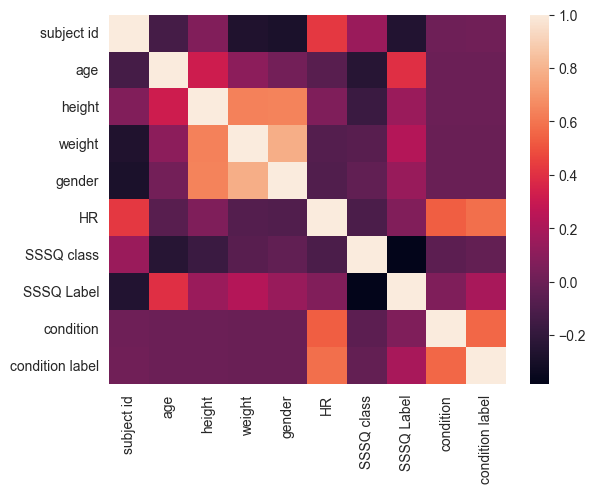

In [17]:
# Correlation Map
corr = wesad.corr()

sns.heatmap(corr)

SSSQ questionnaire items (1 = Not at all, 2 = A little bit, 3 = Somewhat, 4 = Very much,
5 = Extremely):
- I was committed to attaining my performance goals
- I wanted to succeed on the task
- I was motivated to do the task
- I reflected about myself
- I was worried about what other people think of me
- I felt concerned about the impression I was making